In [1]:
import os
import math
import random
import numpy as np
from numpy import linalg as LA
import scipy.spatial.distance
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from skimage.io import imshow
#from sklearn.model_selection import train_test_split

#import tensorflow as tf

import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K

np.random.seed(1337)

Using TensorFlow backend.


In [2]:
#making sure GPU is in use 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9685552669105272442
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11285289370
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9682440756122621960
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [3]:
# Set some parameters
in_height = 64
in_width = 64
out_height = 256
out_width = 256
color_dim = 3
path_in =  '/home/Matthew/image-super-resolution/data/imagenet/40k/res64noisy/'
path_out = '/home/Matthew/image-super-resolution/data/imagenet/40k/res256/'

In [4]:
#todo: add random shuffle . seed = 0

def load_images(path_in, path_out, test_size, valid_size):
    images = next(os.walk(path_in))[2] #oswalk is a generator 
    num_images = len(images)
  
    testSize  = int(test_size * num_images)
    validSize = int(valid_size * num_images)
    trainSize = int(math.ceil((1-(test_size+valid_size)) * num_images))
    
    X_train = np.zeros((trainSize,in_height,in_width,color_dim), dtype=np.float32)
    X_test = np.zeros((testSize,in_height,in_width,color_dim), dtype=np.float32)
    X_valid = np.zeros((validSize,in_height,in_width,color_dim), dtype=np.float32)

    y_train = np.zeros((trainSize,out_height,out_width,color_dim), dtype=np.float32)
    y_test  = np.zeros((testSize,out_height,out_width,color_dim), dtype=np.float32)
    y_valid  = np.zeros((validSize,out_height,out_width,color_dim), dtype=np.float32)
    
    trainIdx = 0
    testIdx = 0
    validIdx = 0
    for idx, image in enumerate(images):
        image_in_path = os.path.join(path_in,image)
        image_out_path = os.path.join(path_out,image)

        image_in_raw =  load_img(image_in_path, grayscale=False)
        image_out_raw = load_img(image_out_path, grayscale=False)

        #converts image to keras preprocessing image, then divide by 255 to un-invert the images
        image_in = (img_to_array(image_in_raw)).squeeze() / 255 
        image_out = (img_to_array(image_out_raw)).squeeze() / 255          
 
        try:
            if (idx % 1000 == 0):
                print("Stage " + str(idx))
        
            if (idx < testSize):
                #print("testIdx " + str(testIdx))
                X_test[testIdx] = image_in
                y_test[testIdx] = image_out
                testIdx+=1
                
            elif (idx < testSize + validSize):
                #print("validIdx " + str(validIdx))
                X_valid[validIdx] = image_in
                y_valid[validIdx] = image_out
                validIdx+=1
                
            else:
                #print("trainIdx " + str(trainIdx))
                X_train[trainIdx] = image_in
                y_train[trainIdx] = image_out
                trainIdx+=1
                
        except Exception as e: 
            print("\nERROR!!!!")
            print(image_in.shape)
            print(trainIdx)
            
            print(image_out.shape)
            print(testIdx)
            
            print("id "+str(idx))
            print(image_in_path)
            print(e)
           
            print("\n")
            
    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [5]:
X_train,X_valid,X_test,y_train,y_valid,y_test = load_images(path_in, path_out, .2, .2)

Stage 0
Stage 1000
Stage 2000
Stage 3000
Stage 4000
Stage 5000
Stage 6000
Stage 7000
Stage 8000
Stage 9000
Stage 10000
Stage 11000
Stage 12000
Stage 13000
Stage 14000
Stage 15000
Stage 16000
Stage 17000
Stage 18000
Stage 19000
Stage 20000
Stage 21000
Stage 22000
Stage 23000
Stage 24000
Stage 25000
Stage 26000
Stage 27000
Stage 28000
Stage 29000
Stage 30000
Stage 31000
Stage 32000
Stage 33000
Stage 34000
Stage 35000
Stage 36000
Stage 37000
Stage 38000
Stage 39000
Stage 40000


In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras import backend as K
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D
from keras.optimizers import RMSprop

In [7]:
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers import  BatchNormalization, Activation, Dropout, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [8]:
#padding output size: see http://cs231n.github.io/convolutional-networks/
# output = (W−F+2P)/S+1   w- input size, f-kernel size, p-padding size 

In [9]:
#model = Sequential()
#inputShape = (in_height, in_width, color_dim)
#model.add(UpSampling2D((4,4),input_shape=inputShape))
#model.add(Conv2D(32, (9, 9), padding='same', kernel_initializer="he_normal")) # 256 X 256 X 32
#model.add(Activation("relu"))
#model.add(Conv2D(16, (7, 7), padding='same', kernel_initializer="he_normal")) # 256 X 256 X 16
#model.add(Activation("relu"))
#model.add(Conv2D(16, (7, 7), padding='same', kernel_initializer="he_normal")) # 256 X 256 X 16
#model.add(Activation("relu"))
#model.add(Conv2D(color_dim, (5, 5), padding='same', kernel_initializer="he_normal")) # 256 X 256 X 3
#model.add(Activation("sigmoid"))

In [10]:
# https://www.depends-on-the-definition.com/unet-keras-segmenting-images/

In [11]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [12]:
def create_network(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    #c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(4, 4), padding='same')(input_img)
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), padding='same') (c6)
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), padding='same') (c7)
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    
    u9 = Conv2DTranspose(n_filters*1, (3, 3), padding='same') (c8)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(color_dim, (1, 1), activation='sigmoid') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [13]:
input_img = Input((in_height, in_width, color_dim), name='img')
model = create_network(input_img, n_filters=32, dropout=0.05, batchnorm=True)

In [14]:
model.compile(loss='mean_squared_error', optimizer = RMSprop(),metrics=['accuracy'])

In [15]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 256, 256, 256)     7168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 256, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 256)     590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 256)     1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 256)     590080    
__________

In [16]:

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model_20.h5', verbose=1, save_best_only=True, save_weights_only=True)
]


In [19]:
batch_size = 8
epochs = 10
trainHistory = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_valid, y_valid),callbacks=callbacks)

Train on 24423 samples, validate on 8141 samples
Epoch 1/10
24423/24423 [==============================] - 10107s 414ms/step - loss: 0.0123 - acc: 0.6271 - val_loss: 0.0128 - val_acc: 0.6926

Epoch 00001: val_loss improved from inf to 0.01279, saving model to model_20.h5
Epoch 2/10
24423/24423 [==============================] - 10089s 413ms/step - loss: 0.0092 - acc: 0.6747 - val_loss: 0.0086 - val_acc: 0.7071

Epoch 00002: val_loss improved from 0.01279 to 0.00856, saving model to model_20.h5
Epoch 3/10
24423/24423 [==============================] - 10086s 413ms/step - loss: 0.0084 - acc: 0.6885 - val_loss: 0.0114 - val_acc: 0.5647

Epoch 00003: val_loss did not improve from 0.00856
Epoch 4/10
24423/24423 [==============================] - 10073s 412ms/step - loss: 0.0079 - acc: 0.6990 - val_loss: 0.0087 - val_acc: 0.6230

Epoch 00004: val_loss did not improve from 0.00856
Epoch 5/10
24423/24423 [==============================] - 10074s 412ms/step - loss: 0.0076 - acc: 0.7082 - val_lo

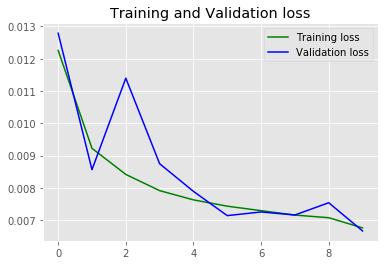

In [20]:
loss = trainHistory.history['loss']
val_loss = trainHistory.history['val_loss']
epochsRange = range(len(trainHistory.history['loss']))
plt.figure()
plt.plot(epochsRange, loss, label='Training loss',color='g')
plt.plot(epochsRange, val_loss, label='Validation loss',color='b')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

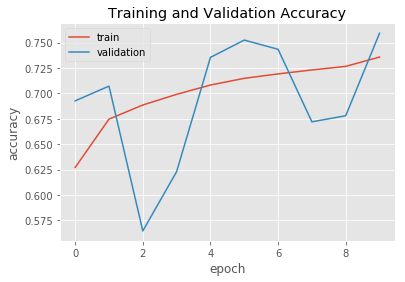

In [21]:
plt.plot(trainHistory.history['acc'])
plt.plot(trainHistory.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
print(trainHistory.history.keys())

dict_keys(['loss', 'lr', 'val_loss', 'acc', 'val_acc'])


In [ ]:
pred = model.predict(X_test)

/home/Matthew/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


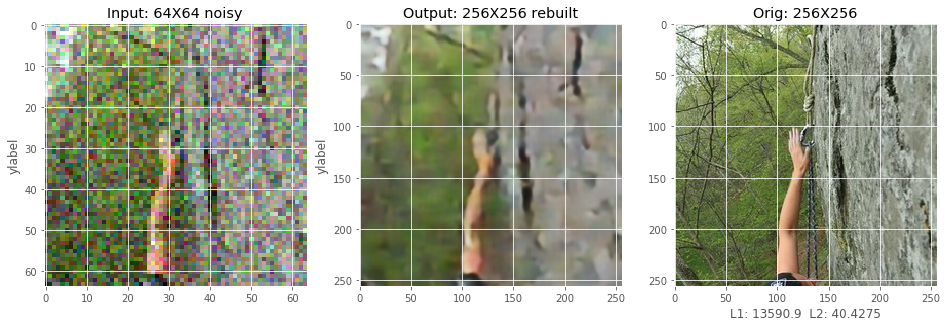

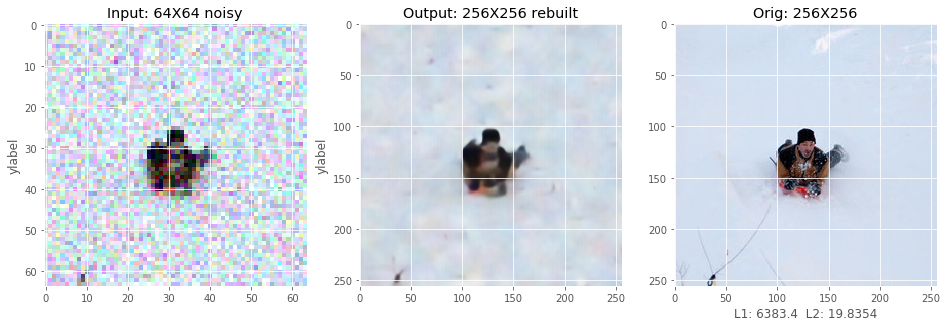

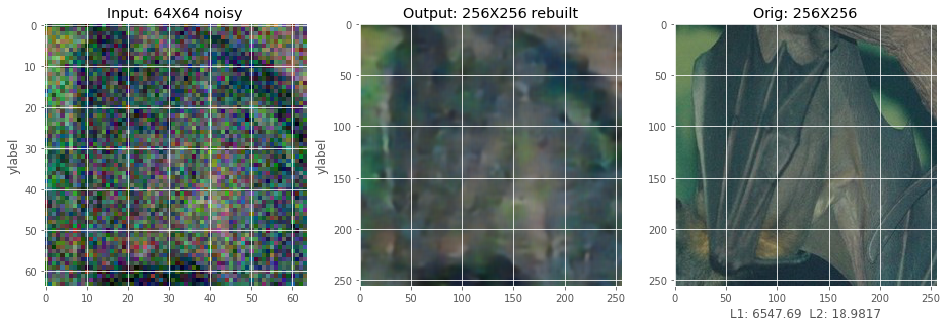

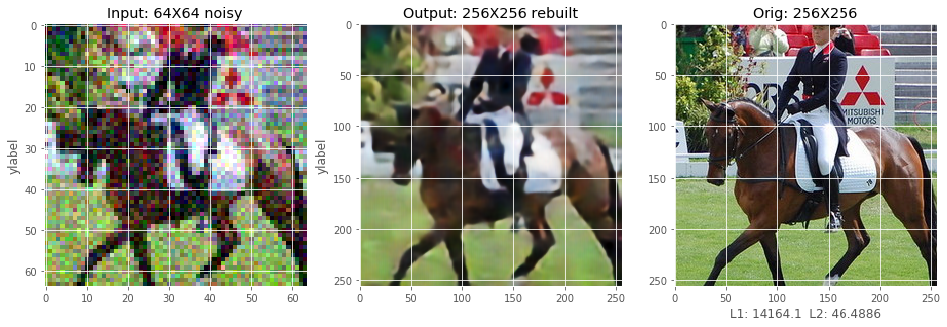

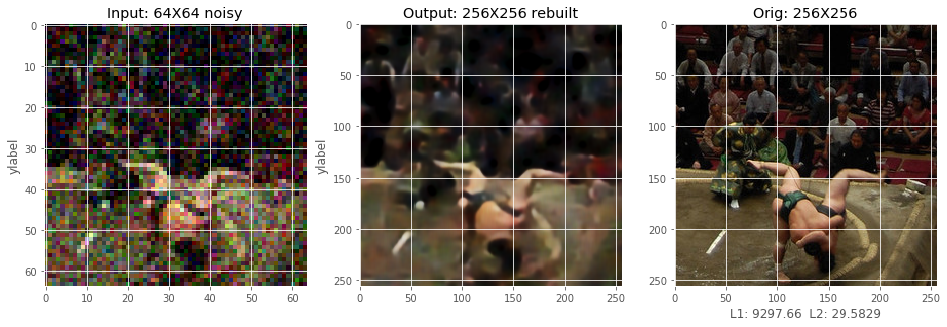

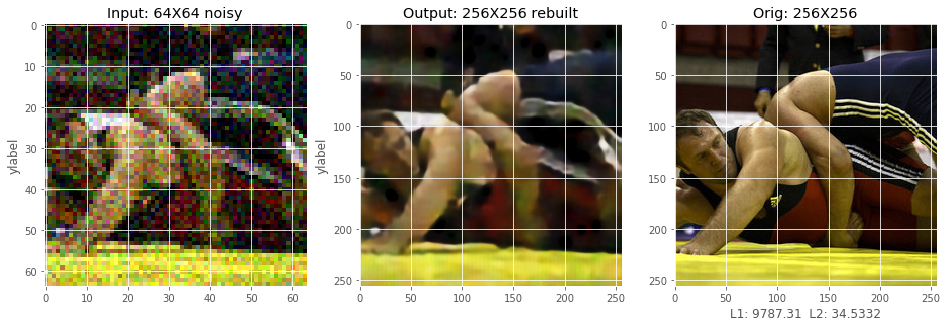

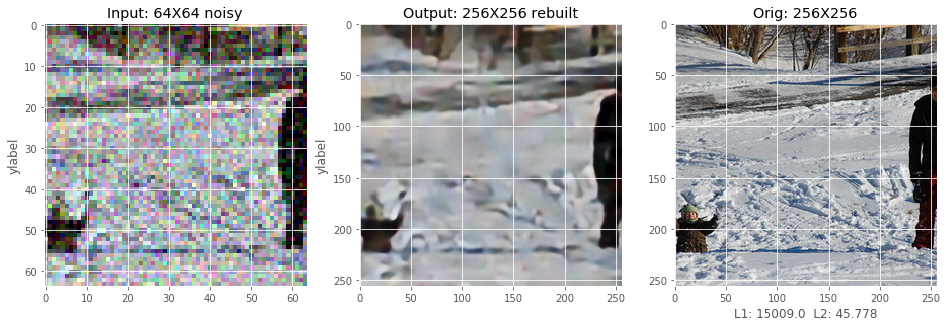

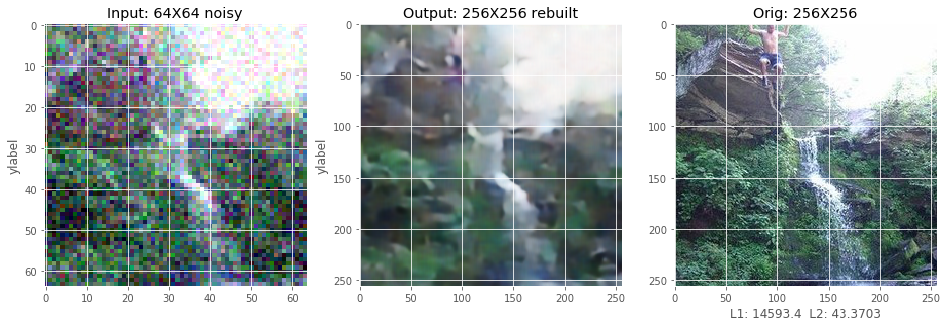

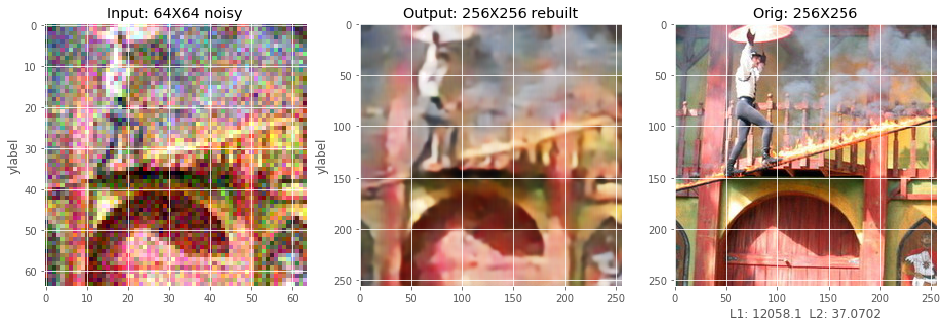

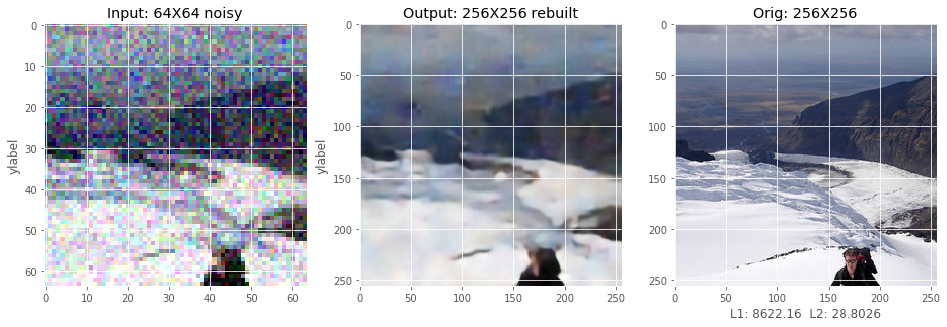

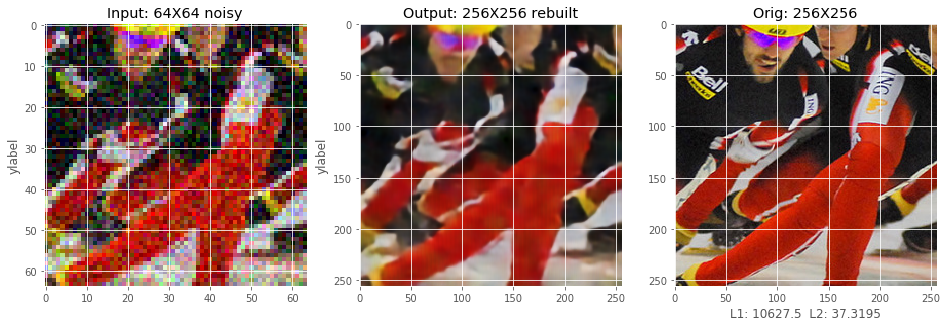

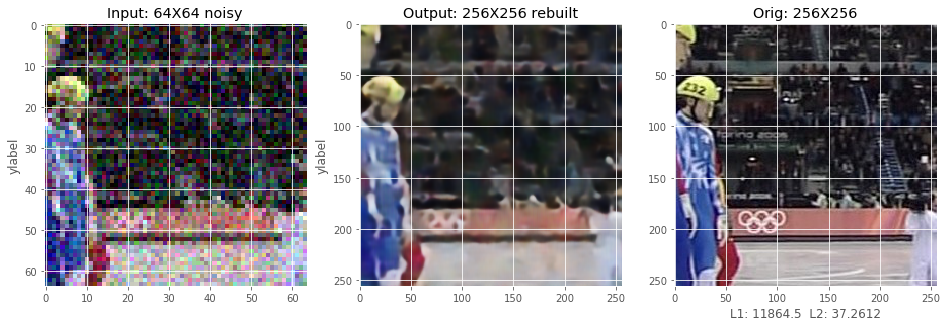

In [ ]:
def CalcL1(obj1,obj2):
    #obj1 = np.reshape(obj1,(obj1.shape[0]*obj1.shape[1]*obj1.shape[2],1))
    #obj2 = np.reshape(obj2,(obj2.shape[0]*obj2.shape[1]*obj2.shape[2],1))
    #return scipy.spatial.distance.cdist(obj1, obj2, metric='cityblock')
    return np.absolute(obj1-obj2).sum()

def CalcL2(obj1,obj2):
    return LA.norm(obj1-obj2)


for i in range(40):
    fig = plt.figure(figsize=(16,16))

    ax = fig.add_subplot(1, 3, 1) # 1 row, 2 columns, index in subplot
    plt.imshow(X_test[i]) # show image to previous defined subplot
    ax.title.set_text('Input: 64X64 noisy')
    ax.set_ylabel('ylabel')
    
    ax = fig.add_subplot(1, 3, 2)
    plt.imshow(pred[i])
    ax.title.set_text('Output: 256X256 rebuilt')
    ax.set_ylabel('ylabel')
    
    ax = fig.add_subplot(1, 3, 3) # 1 row, 2 columns, index in subplot
    plt.imshow(y_test[i]) # show image to previous defined subplot
    ax.title.set_text('Orig: 256X256')
    l1Dist = CalcL1(pred[i],y_test[i])
    l2Dist = CalcL2(pred[i],y_test[i])
    ax.set_xlabel('L1: ' + str(l1Dist) + '  L2: ' + str(l2Dist))
    #ax.set_xlabel(' L2: ' + str(l2Dist))

